# Monsoon (Sperber)

This notebook demonstrates how to use the PCDMI Monsoon (Sperber) driver.

It is expected that you have downloaded the sample data as demonstrated in [the download notebook](Demo_0_download_data.ipynb)

The following cell reads in the choices you made during the download data step.

In [1]:
from user_choices import demo_data_directory, demo_output_directory

For immediate help with using the monsoon (sperber) driver, use the `--help` flag, demonstrated here:

In [2]:
%%bash
driver_monsoon_sperber.py --help

usage: driver_monsoon_sperber.py [-h] [--parameters PARAMETERS]
                                 [--diags OTHER_PARAMETERS [OTHER_PARAMETERS ...]]
                                 [--mip MIP] [--exp EXP]
                                 [--results_dir RESULTS_DIR]
                                 [--reference_data_path REFERENCE_DATA_PATH]
                                 [--modpath MODPATH] [--frequency FREQUENCY]
                                 [--realm REALM]
                                 [--reference_data_name REFERENCE_DATA_NAME]
                                 [--reference_data_lf_path REFERENCE_DATA_LF_PATH]
                                 [--modpath_lf MODPATH_LF] [--varOBS VAROBS]
                                 [--varModel VARMODEL]
                                 [--ObsUnitsAdjust OBSUNITSADJUST]
                                 [--ModUnitsAdjust MODUNITSADJUST]
                                 [--units UNITS] [--osyear OSYEAR]
                                 [--msy

## Basic Example

This metric uses daily precipitation data and computes monsoon scores over 6 preset regions, shown below.

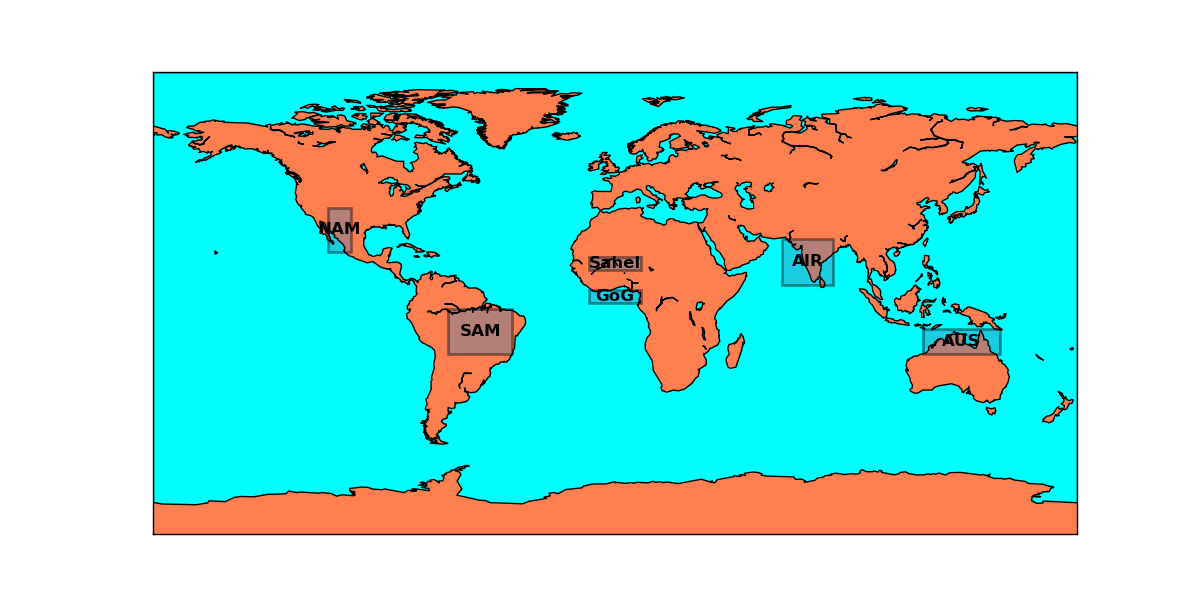

In [3]:
from IPython.display import Image

Image(filename = "../../../pcmdi_metrics/monsoon_sperber/doc/monsoon_domain_map.png")

First we demonstrate the parameter file for the basic example.

In [4]:
with open("basic_monsoon_sperber_param.py") as f:
    print(f.read())

import os

#
#  OPTIONS ARE SET BY USER IN THIS FILE AS INDICATED BELOW BY:
#
#

# MODEL VARIABLES THAT MUST BE SET
mip = 'cmip5'
exp = 'historical'
frequency = 'da'
realm = 'atm'
realization = 'r1i1p1'

# MODEL VERSIONS AND ROOT PATH
modnames = ['ACCESS1-0']
modpath = '~/Metrics/demo_data/pr.day.ACCESS1-0.historical.r1i1p1.20000101-20051231.nc'
modpath_lf = '~/Metrics/demo_data/sftlf_fx_ACCESS1-0_historical_r0i0p0.nc' # land fraction mask

varModel = 'pr'
ModUnitsAdjust = (True, 'multiply', 86400.0)  # kg m-2 s-1 to mm day-1
units = 'mm/d'

msyear = 2000
meyear = 2002

# ROOT PATH FOR OBSERVATIONS
reference_data_path = '~/Metrics/demo_data/pr_day_GPCP-1-3_BE_gn_v20200924_19961002-20170101.nc'
reference_data_name = 'GPCP-1-3'
reference_data_lf_path = '~/Metrics/demo_data/NCL_LandSeaMask_rewritten.nc'  # land fraction mask

varOBS = 'pr'
ObsUnitsAdjust = (True, 'multiply', 86400.0)  # kg m-2 s-1 to mm day-1

osyear = 1996
oeyear = 1998

includeOBS = True

# DIRECTORY WHERE TO PUT RESULT

To run the driver using only a parameter file for inputs, do the following:

In [5]:
%%bash
driver_monsoon_sperber.py -p basic_monsoon_sperber_param.py

models: ['ACCESS1-0']
realization:  r1i1p1
demo_output/monsoon_sperber/Ex1
demo_output/monsoon_sperber/Ex1
demo_output/monsoon_sperber/Ex1
debug:  False
 -----  obs  ---------------------
lf_path:  ~/Metrics/demo_data/NCL_LandSeaMask_rewritten.nc
 ---  obs  ---
~/Metrics/demo_data/pr_day_GPCP-1-3_BE_gn_v20200924_19961002-20170101.nc
check: calendar:  gregorian
check: year, d.shape:  1997 (365, 180, 360)
check: year, d.shape:  1998 (365, 180, 360)
timechk:  obs obs 9.772984027862549
 -----  ACCESS1-0  ---------------------
lf_path:  ~/Metrics/demo_data/sftlf_fx_ACCESS1-0_historical_r0i0p0.nc
 ---  historical  ---
/Users/ordonez4/Metrics/demo_data/pr.day.ACCESS1-0.historical.r1i1p1.20000101-20051231.nc

check: calendar:  proleptic_gregorian
check: year, d.shape:  2000 (366, 145, 192)
check: year, d.shape:  2001 (365, 145, 192)
check: year, d.shape:  2002 (365, 145, 192)
timechk:  ACCESS1-0 historical 8.319144010543823


INFO::2021-03-17 16:50::pcmdi_metrics:: Results saved to a json file: /Users/ordonez4/Documents/git/pcmdi_metrics/doc/jupyter/Demo/demo_output/monsoon_sperber/Ex1/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2002.json
INFO::2021-03-17 16:50::pcmdi_metrics:: Results saved to a json file: /Users/ordonez4/Documents/git/pcmdi_metrics/doc/jupyter/Demo/demo_output/monsoon_sperber/Ex1/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2002.json


## Output options

There are several options for output data format. Users can choose to generate metrics in netCDF format along with png graphics.

To save these results in a different folder, the `--result_dir` value is changed. Using `$1` to refer to the `demo_output_directory` variable is a trick for the Jupyter Notebook and is not needed for regular command line use.

In [6]:
%%bash -s "$demo_output_directory"
driver_monsoon_sperber.py -p basic_monsoon_sperber_param.py \
--nc_out --plot --results_dir $1/monsoon_sperber/Ex2

models: ['ACCESS1-0']
realization:  r1i1p1
demo_output/monsoon_sperber/Ex2
demo_output/monsoon_sperber/Ex2
demo_output/monsoon_sperber/Ex2
debug:  False
 -----  obs  ---------------------
lf_path:  ~/Metrics/demo_data/NCL_LandSeaMask_rewritten.nc
 ---  obs  ---
~/Metrics/demo_data/pr_day_GPCP-1-3_BE_gn_v20200924_19961002-20170101.nc
check: calendar:  gregorian
plot: region AIR nrows 3 ncols 2 index 1
plot: region AUS nrows 3 ncols 2 index 2
plot: region Sahel nrows 3 ncols 2 index 3
plot: region GoG nrows 3 ncols 2 index 4
plot: region NAmo nrows 3 ncols 2 index 5
plot: region SAmo nrows 3 ncols 2 index 6
check: year, d.shape:  1997 (365, 180, 360)
check: year, d.shape:  1998 (365, 180, 360)
timechk:  obs obs 10.253013134002686
 -----  ACCESS1-0  ---------------------
lf_path:  ~/Metrics/demo_data/sftlf_fx_ACCESS1-0_historical_r0i0p0.nc
 ---  historical  ---
/Users/ordonez4/Metrics/demo_data/pr.day.ACCESS1-0.historical.r1i1p1.20000101-20051231.nc

check: calendar:  proleptic_gregorian


INFO::2021-03-17 16:51::pcmdi_metrics:: Results saved to a json file: /Users/ordonez4/Documents/git/pcmdi_metrics/doc/jupyter/Demo/demo_output/monsoon_sperber/Ex2/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2002.json
INFO::2021-03-17 16:51::pcmdi_metrics:: Results saved to a json file: /Users/ordonez4/Documents/git/pcmdi_metrics/doc/jupyter/Demo/demo_output/monsoon_sperber/Ex2/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2002.json


## Results

At a minimum, this driver will produce a JSON file containing the monsoon metrics in the `result_dir`. If the user requests the binary and plot outputs, those will also be present in the `result_dir`. Looking at the results from Ex2:

In [7]:
! ls {demo_output_directory + "/monsoon_sperber/Ex2"}

cmip5_ACCESS1-0_historical_historical_monsoon_sperber_2000-2002.nc
cmip5_ACCESS1-0_historical_historical_monsoon_sperber_2000-2002.png
cmip5_obs_historical_obs_monsoon_sperber_1997-1998.nc
cmip5_obs_historical_obs_monsoon_sperber_1997-1998.png
monsoon_sperber_stat_cmip5_historical_da_atm_2000-2002.json
monsoon_sperber_stat_cmip5_historical_da_atm_2000-2002_org_2281.json
monsoon_sperber_stat_cmip5_historical_da_atm_2000-2002_org_2493.json


The monsoon metrics are found in the "RESULTS" object in the JSON file. Below we extract and display these metrics.

In [8]:
import json
metrics_file = demo_output_directory + "/monsoon_sperber/Ex2/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2002.json"
with open(metrics_file) as f:
    results = json.load(f)["RESULTS"]
print(json.dumps(results, indent = 2))

{
  "ACCESS1-0": {
    "historical": {
      "AIR": {
        "decay_index": 50,
        "duration": 12,
        "onset_index": 39,
        "slope": 0.05073338240531062
      },
      "AUS": {
        "decay_index": 49,
        "duration": 15,
        "onset_index": 35,
        "slope": 0.04484002869910437
      },
      "GoG": {
        "decay_index": 38,
        "duration": 19,
        "onset_index": 20,
        "slope": 0.02178954824649923
      },
      "NAmo": {
        "decay_index": 52,
        "duration": 29,
        "onset_index": 24,
        "slope": 0.02171552236318006
      },
      "SAmo": {
        "decay_index": 53,
        "duration": 28,
        "onset_index": 26,
        "slope": 0.021887613404575436
      },
      "Sahel": {
        "decay_index": 46,
        "duration": 19,
        "onset_index": 28,
        "slope": 0.03450343762369387
      }
    }
  }
}


For more help interpreting these values, please consult the following paper:
 
Sperber, K. and H. Annamalai, 2014:
The use of fractional accumulated precipitation for the evaluation of the
annual cycle of monsoons. Climate Dynamics, 43:3219-3244,
doi: 10.1007/s00382-014-2099-3

If `plot = True`, the driver also outputs figures that compare the precipitation pentads between model and observations.

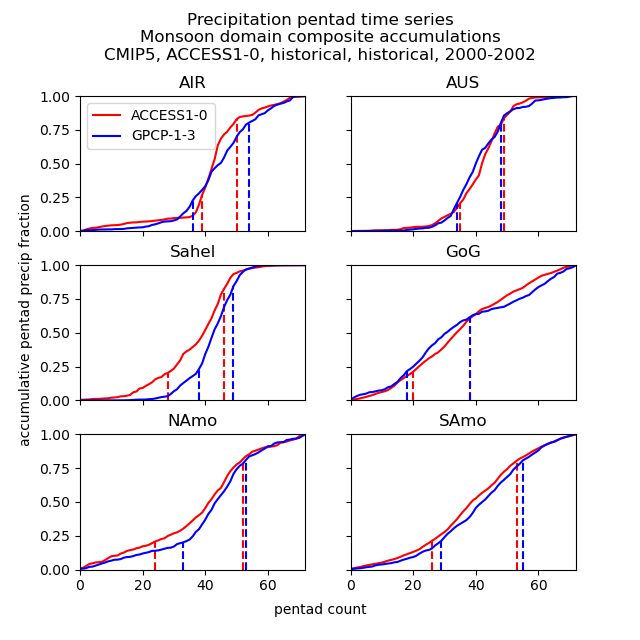

In [9]:
Image(filename = demo_output_directory + "/monsoon_sperber/Ex2/cmip5_ACCESS1-0_historical_historical_monsoon_sperber_2000-2002.png")